In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

/kaggle/input


In [ ]:
# Download and extract Waste Classification dataset
!kaggle datasets download -d techsash/waste-classification-data && unzip waste-classification-data.zip -d Waste_Classification_Dataset

Streaming output truncated to the last 5000 lines.
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: Waste_Classification_Dataset/dataset/DATASET/TRAIN/R/R_5508.jpg  
  in

In [ ]:
train_path = "/content/Waste_Classification_Dataset/DATASET/TRAIN"
test_path = "/content/Waste_Classification_Dataset/DATASET/TEST"

## Import Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
# Instead of:
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Use this:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

## Visualization

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:03<00:00, 2503.82it/s]


In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

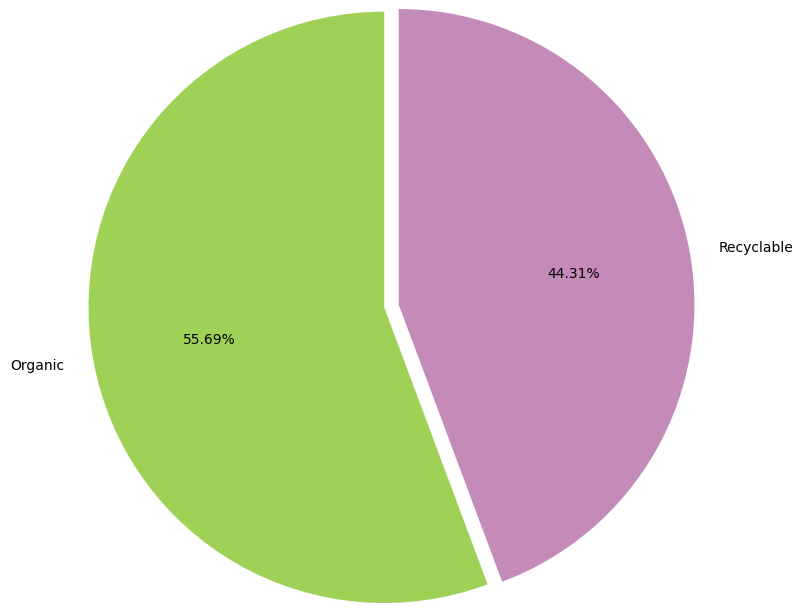

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

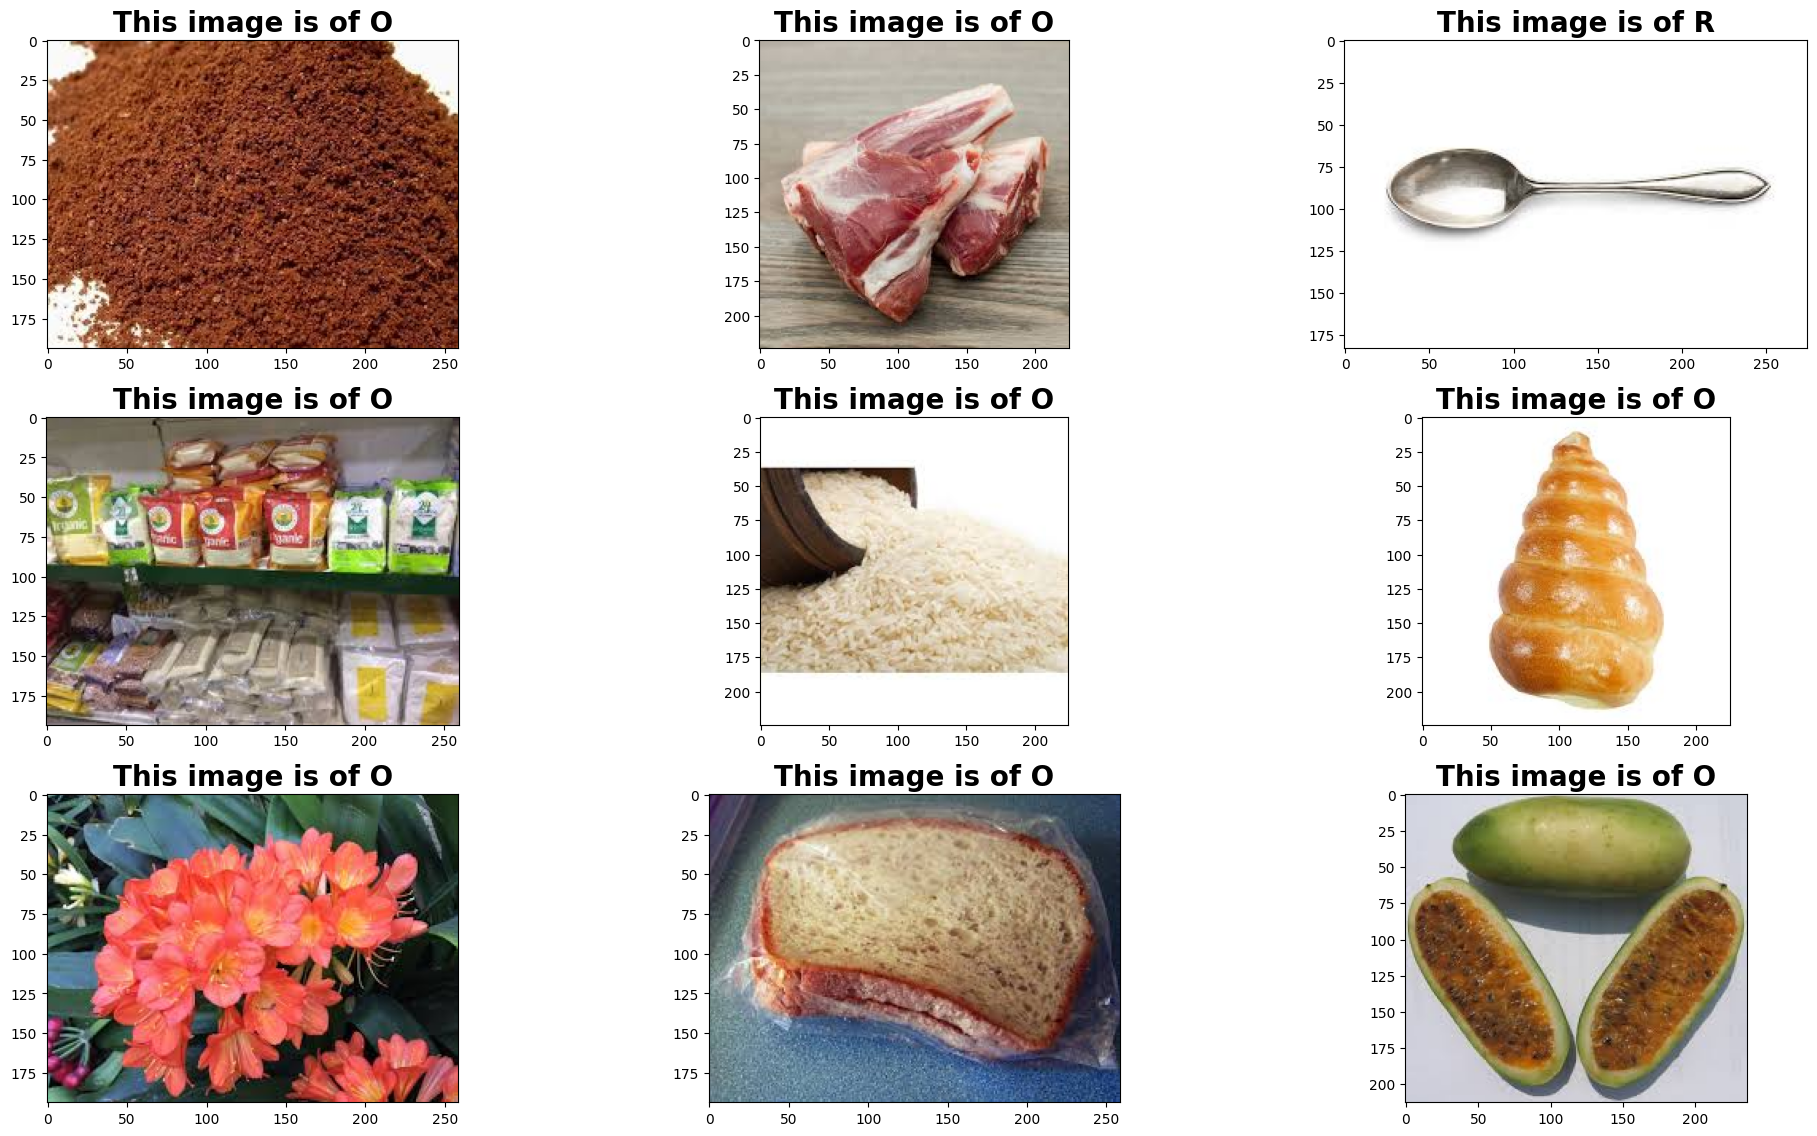

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

* O -> Organic
* R -> Recyclable

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 93s 765ms/step - accuracy: 0.6690 - loss: 0.7302 - val_accuracy: 0.8663 - val_loss: 0.3707
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 101s 558ms/step - accuracy: 0.8156 - loss: 0.4427 - val_accuracy: 0.8814 - val_loss: 0.2912
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 553ms/step - accuracy: 0.8398 - loss: 0.3933 - val_accuracy: 0.8611 - val_loss: 0.3332
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 551ms/step - accuracy: 0.8464 - loss: 0.3753 - val_accuracy: 0.8806 - val_loss: 0.2980
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 550ms/step - accuracy: 0.8658 - loss: 0.3371 - val_accuracy: 0.8826 - val_loss: 0.2895
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 557ms/step - accuracy: 0.8756 - loss: 0.3076 - val_accuracy: 0.8747 - val_loss: 0.3220
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 569ms/step - accuracy: 0.8813 - loss: 0.2955 - val_accuracy: 0.8973 - val_loss: 0.2803
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 561ms/step - accuracy: 0.9019 - loss: 0.2532 - val_acc

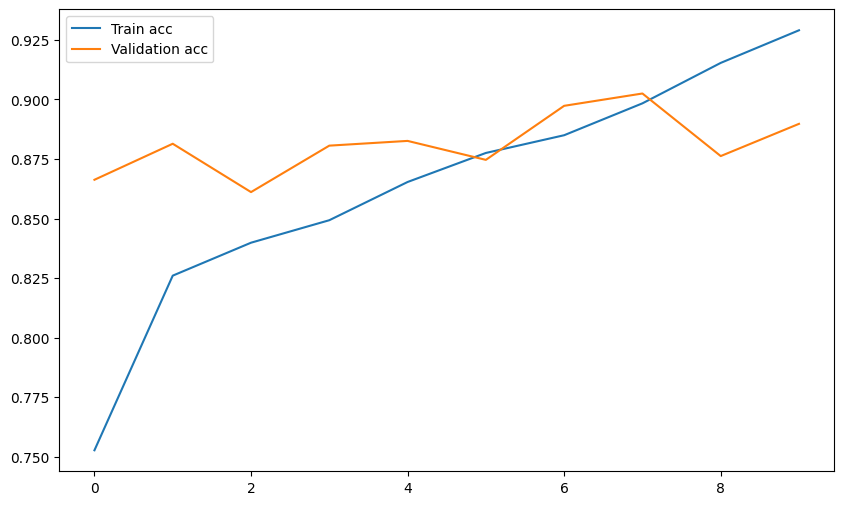

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

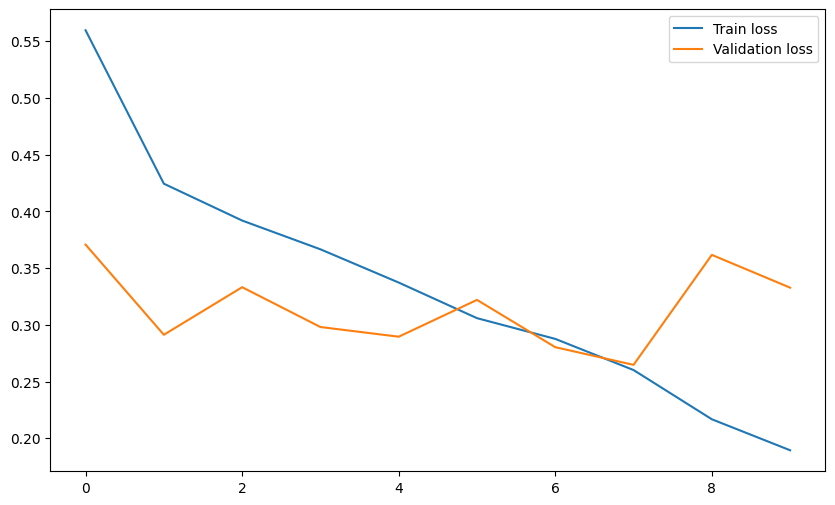

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
This image -> Organic


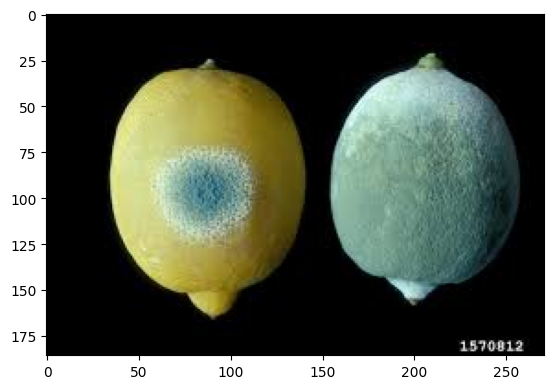

In [ ]:
test_img = cv2.imread("/content/Waste_Classification_Dataset/DATASET/TRAIN/O/O_10000.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This image -> Recyclable


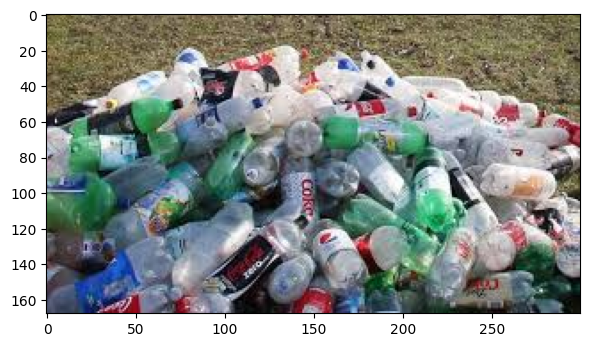

In [ ]:
test_img = cv2.imread("/content/Waste_Classification_Dataset/DATASET/TRAIN/R/R_1028.jpg")
predict_func(test_img)